# Car Price Prediction using Regression
This project aims to predict car prices using machine learning regression techniques. We will use a dataset of used cars and follow a complete ML workflow.

In [1]:
#  Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Load the Car Price Dataset
data = pd.read_csv('car_price.csv')

#  Display the First Few Rows of the Dataset
display(data.head())

#  Show Dataset Information (Columns, Data Types, Null Counts)
data.info()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## 2. Clean the dataset and handle missing values
We will check for missing values and drop or impute as needed.

In [2]:
#  Check for Missing Values in Each Column
missing = data.isnull().sum()

#  Display Columns with Missing Values Only
display(missing[missing > 0])

#  Drop Columns with More Than 20% Missing Values
# (Keep columns that have at least 80% non-null values)
data = data.dropna(axis=1, thresh=len(data) * 0.8)

#  Drop Rows with Remaining Missing Values
clean_data = data.dropna()


Series([], dtype: int64)

## 3. Encode categorical features and scale numerical ones
We will use one-hot encoding for categorical variables and StandardScaler for numeric features.

In [3]:
print(clean_data.dtypes)

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


In [4]:
#  Select Numerical Columns (Exclude Target Columns: 'Selling_Price' and 'Price_Class')
numerical_cols = clean_data.select_dtypes(include=['number']).columns.drop(
    [col for col in ['Selling_Price', 'Price_Class'] if col in clean_data.columns]
)

In [5]:
#  Select Numerical Columns with Data Types 'int64' or 'float64'
#  Exclude Target Columns: 'Selling_Price' and 'Price_Class' (ignore if not present)
numerical_cols = clean_data.select_dtypes(include=['int64', 'float64']).columns.drop(
    ['Selling_Price', 'Price_Class'],
    errors='ignore'
)

In [6]:
#  Import Preprocessing and Pipeline Tools
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#  Identify Categorical Columns (Exclude 'Selling_Price' if present)
categorical_cols = clean_data.select_dtypes(include=['object']).columns.drop(
    'Seling_Price', errors='ignore'
)

#  Identify Numerical Columns (Exclude 'Kms_Driven' if present)
numerical_cols = clean_data.select_dtypes(include=['int64', 'float64']).columns.drop(
    'Kms_Driven', errors='ignore'
)

#  Define Preprocessing Pipeline:
#    - One-Hot Encode Categorical Columns
#    - Standardize Numerical Columns
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

#  Split Data into Features (X) and Target (y)
X = clean_data.drop(['Kms_Driven', 'Seling_Price'], axis=1, errors='ignore')
y = clean_data['Kms_Driven']


## 4. Split data into training and testing sets

In [7]:
#  Import Train-Test Split Utility
from sklearn.model_selection import train_test_split

#  Split Data into Training and Testing Sets
# - 80% for training
# - 20% for testing
# - Use random_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 5. Train regression models like Linear Regression

In [8]:
# 📈 Import Linear Regression Model
from sklearn.linear_model import LinearRegression

# 🔗 Create a Pipeline:
#   - 'pre': Apply the preprocessing steps
#   - 'reg': Train a Linear Regression model
reg_pipeline = Pipeline([
    ('pre', preprocessor),
    ('reg', LinearRegression())
])

# 🚀 Train the Pipeline on the Training Data
reg_pipeline.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['Year', 'Selling_Price', 'Present_Price', 'Owner'], dtype='object'))])),
                ('reg', LinearRegression())])

## 6. Evaluate the model using MSE, RMSE, and R² metrics

In [9]:
#  Import Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score

#  Make Predictions on the Test Set
y_pred = reg_pipeline.predict(X_test)

#  Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

#  Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

#  Calculate R-squared (R²) Score
r2 = r2_score(y_test, y_pred)

#  Print the Evaluation Results
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MSE: 414034608.13
RMSE: 20347.84
R²: 0.27


## 7. Visualize model predictions and data trends

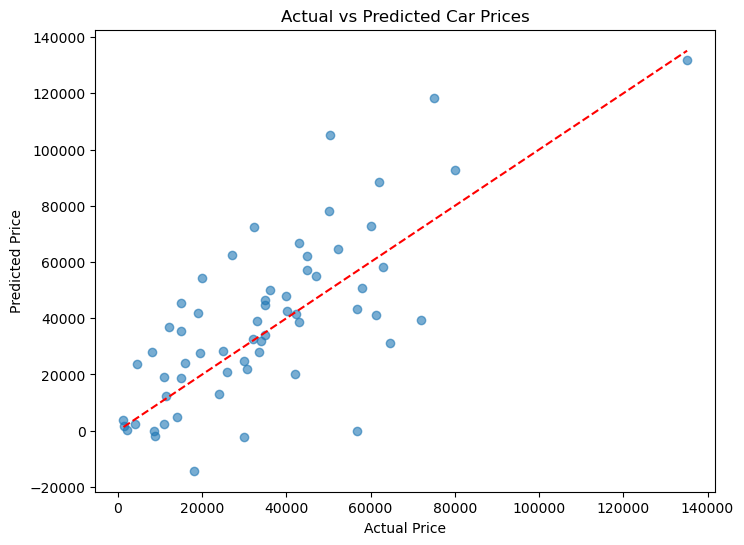

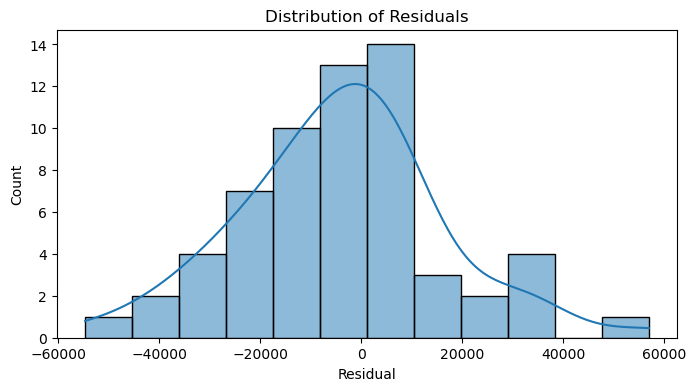

In [10]:
#  Scatter Plot: Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')

#  Add a Reference Line (Perfect Predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

#  Distribution Plot: Residuals (Prediction Errors)
residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.show()


In [11]:
#  FOR ANN Import Keras Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
# Apply Preprocessing to Training and Test Data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [13]:
#  Define ANN Model Architecture
model = Sequential()
# Input layer + First hidden layer (example: 64 neurons, ReLU)
model.add(Dense(64, activation='relu', input_shape=(X_train_transformed.shape[1],)))
# Second hidden layer (optional)
model.add(Dense(32, activation='relu'))
# Output layer (1 neuron for regression)
model.add(Dense(1))

C:\Users\wahaa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#  Compile Model for Regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [15]:
#  Add Early Stopping to Prevent Overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#  Train the Model
history = model.fit(
    X_train_transformed, y_train,
    validation_data=(X_test_transformed, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 3639388416.0000 - mae: 38931.7812 - val_loss: 1774737280.0000 - val_mae: 34738.4492
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3666776576.0000 - mae: 37765.5469 - val_loss: 1774715136.0000 - val_mae: 34738.1484
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2457185536.0000 - mae: 35744.1172 - val_loss: 1774692096.0000 - val_mae: 34737.8477
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 3027636992.0000 - mae: 36928.1328 - val_loss: 1774663040.0000 - val_mae: 34737.4648
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3054387712.0000 - mae: 38359.3672 - val_loss: 1774623744.0000 - val_mae: 34736.9492
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 3559251712.0000 - mae: 37393.0586 - val_loss: 1774569344.0000 - val_mae: 34736.2383
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 3080010240.0000 - mae: 36761.7578 - val_loss: 1774494720.0000 - val_mae: 34735.2695
Epoch 8/10
8

In [17]:
#  Make predictions with the ANN
y_pred_ann = model.predict(X_test_transformed).flatten()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


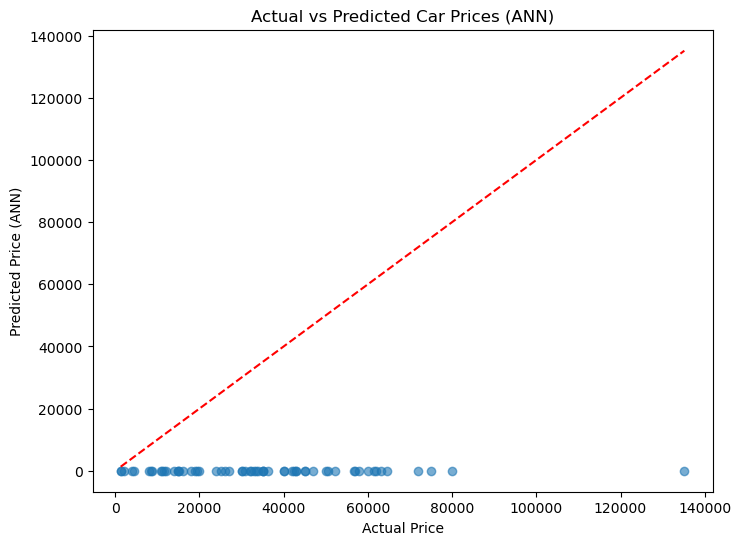

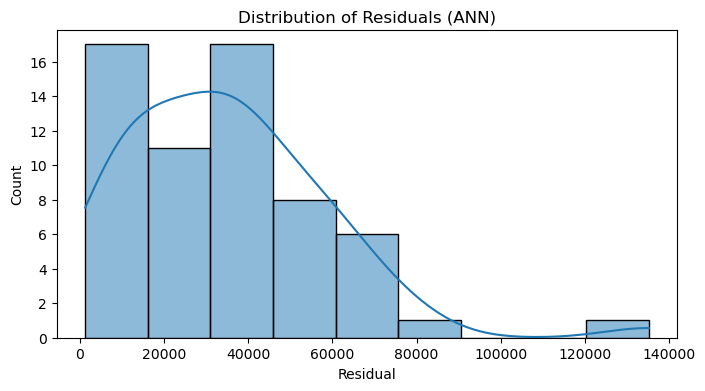

In [19]:
#  Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ann, alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price (ANN)')
plt.title('Actual vs Predicted Car Prices (ANN)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

#  Residuals
residuals_ann = y_test - y_pred_ann
plt.figure(figsize=(8, 4))
sns.histplot(residuals_ann, kde=True)
plt.title('Distribution of Residuals (ANN)')
plt.xlabel('Residual')
plt.show()